In [1]:
import matplotlib.pyplot as plt
import json
from os.path import join as pjoin
import numpy as np

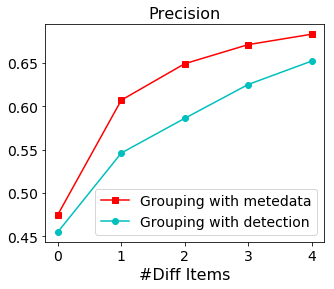

In [19]:
x = [0,1,2,3,4]#点的横坐标
k1 = [0.475, 0.607, 0.649, 0.671, 0.683]#线1的纵坐标
k2 = [0.455, 0.546, 0.586, 0.625, 0.652]#线2的纵坐标
plt.rcParams['font.size'] = '14'
plt.figure(figsize=(5,4))#设置画布的尺寸

plt.plot(x,k1,'s-',color = 'r',label="Grouping with metedata")#s-:方形
plt.plot(x,k2,'o-',color = 'c',label="Grouping with detection")#o-:圆形
plt.xlabel("#Diff Items", fontsize=16)#横坐标名字
# plt.ylabel("Score")#纵坐标名字
plt.legend(loc = "best")#图例
plt.title('Precision', fontsize=16)

plt.savefig('statistics/precision.png', bbox_inches='tight', pad_inches=0.2)
plt.show()

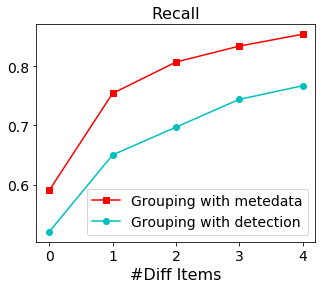

In [23]:
x = [0,1,2,3,4]#点的横坐标
k1 = [0.590, 0.754, 0.807, 0.834, 0.854]#线1的纵坐标
k2 = [0.520, 0.650, 0.697, 0.744, 0.767]#线2的纵坐标
plt.figure(figsize=(5,4))#设置画布的尺寸

plt.plot(x,k1,'s-',color = 'r',label="Grouping with metedata")#s-:方形
plt.plot(x,k2,'o-',color = 'c',label="Grouping with detection")#o-:圆形
plt.xlabel("#Diff Items", fontsize=16)#横坐标名字
# plt.ylabel("Score")#纵坐标名字
plt.legend(loc = "best")#图例
plt.title('Recall', fontsize=16)

plt.savefig('statistics/recall.png', bbox_inches='tight', pad_inches=0.2)
plt.show()

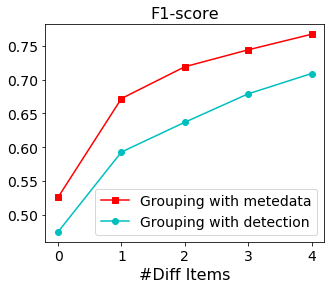

In [21]:
x = [0,1,2,3,4]#点的横坐标
k1 = [0.526, 0.672, 0.719, 0.744, 0.767]#线1的纵坐标
k2 = [0.475, 0.593, 0.637, 0.679, 0.709]#线2的纵坐标
plt.figure(figsize=(5,4))#设置画布的尺寸

plt.plot(x,k1,'s-',color = 'r',label="Grouping with metedata")#s-:方形
plt.plot(x,k2,'o-',color = 'c',label="Grouping with detection")#o-:圆形
plt.xlabel("#Diff Items", fontsize=16)#横坐标名字
# plt.ylabel("Score")#纵坐标名字
plt.legend(loc = "best")#图例
plt.title('F1-score', fontsize=16)

plt.savefig('statistics/f1.png', bbox_inches='tight', pad_inches=0.2)
plt.show()

In [19]:
thresh = 5
runtime_det = []
for t in open('statistics/runtime-det.txt').readlines():
    if float(t[:-1]) > thresh:
        continue
    runtime_det.append(round(float(t[:-1]), 2))

runtime_group = []
for t in open('statistics/runtime-group.txt').readlines():
    if float(t[:-1]) > thresh:
        continue
    runtime_group.append(round(float(t[:-1]), 2))

runtime_group_gt = []
for t in open('statistics/runtime-group-gt.txt').readlines():
    if float(t[:-1]) > thresh:
        continue
    runtime_group_gt.append(round(float(t[:-1]), 2))

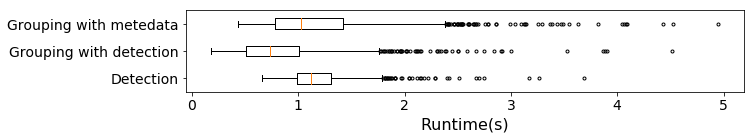

In [64]:
plt.figure(figsize=(10,1.5))#设置画布的尺寸
# plt.title('Runtime of different processing',fontsize=20)
plt.xlabel("Runtime(s)", fontsize=16)#横坐标名字

plt.rcParams['font.size'] = '14'
labels = ['Detection','Grouping with detection','Grouping with metedata']#图例
plt.boxplot([runtime_det, runtime_group, runtime_group_gt], labels = labels, vert=False, widths=0.4, flierprops={'markersize':3})
plt.savefig('statistics/runtime.png', bbox_inches='tight', pad_inches=0.2)
plt.show()

In [22]:
np.mean(runtime_det)

1.181494042163153

In [18]:
np.mean(item_numbers_result_det)

5.096108022239873

In [11]:
result_root_det = 'E:\\Mulong\\Result\\rico-layout\\result'
group_data_gt = json.load(open('item_data_class.json'))

group_num = 0
item_numbers_gt = []
for img in group_data_gt:
    data = group_data_gt[img]
    if 30 > len(data['list']) > 0:
        item_numbers_gt.append(len(data['list']))
        group_num += 1
    if len(data['multitab']) > 0:
        item_numbers_gt.append(len(data['multitab']))
        group_num += 1

In [12]:
group_num

1176

In [4]:
item_numbers_result_gt = []
group_num = 0
result_root_det = 'E:\\Mulong\\Result\\rico-layout\\result-gt-compos'
for img_name in open('select.txt', 'r').readlines():
    img_name = img_name.replace('\n', '')
    group_result = json.load(open(pjoin(result_root_det, 'layout', img_name + '-list.json')))['list']
    for g in group_result:
        group_num += 1
        if len(g) > 20: continue
        item_numbers_result_gt.append(len(g))

In [5]:
item_numbers_result_det = []
group_num = 0
result_root_det = 'E:\\Mulong\\Result\\rico-layout\\result'
for img_name in open('select.txt', 'r').readlines():
    img_name = img_name.replace('\n', '')
    group_result = json.load(open(pjoin(result_root_det, 'layout', img_name + '-list.json')))['list']
    for g in group_result:
        group_num += 1
        if len(g) > 20: continue
        item_numbers_result_det.append(len(g))

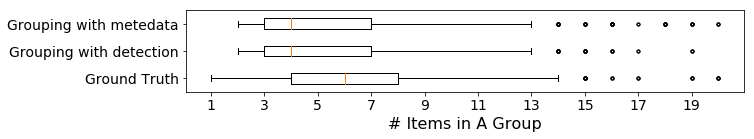

In [10]:
plt.figure(figsize=(10,1.5))#设置画布的尺寸
# plt.title('Runtime of different processing',fontsize=20)
plt.xlabel("# Items in A Group", fontsize=16)#横坐标名字
plt.xticks(np.arange(1, 20, 2))
plt.rcParams['font.size'] = '14'

labels = ['Ground Truth','Grouping with detection','Grouping with metedata']#图例
plt.boxplot([item_numbers_gt,item_numbers_result_det, item_numbers_result_gt], labels = labels, vert=False, widths=0.4, flierprops={'markersize':3})
plt.savefig('statistics/itemnum.png', bbox_inches='tight', pad_inches=0.2)
plt.show()

In [80]:
group_num

1465